In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
x_train = genfromtxt('x-train.csv', delimiter=',')
y_train = genfromtxt('y-train.csv', delimiter=',')
test = genfromtxt('test.csv', delimiter=',')

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x_train))
print(scaler_y.fit(y_train))
xscale=scaler_x.transform(x_train)
yscale=scaler_y.transform(y_train)
test = scaler_x.transform(test)
 
print(x_train.shape)
print(y_train.shape)
print(test.shape)
#print(x_train[0])
print(y_train[0])

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
(1456, 299)
(1456,)
(1459, 299)
12.247694320220994


C:\Users\Siyuan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Siyuan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [3]:
x_tr, x_val, y_tr, y_val = train_test_split(xscale, yscale, test_size=0.2)

In [4]:
print(x_tr.shape)
print(x_val.shape)
print(y_tr.shape)
print(y_val.shape)
print(y_tr[0])

(1164, 299)
(292, 299)
(1164,)
(292,)
0.7678746165634931


In [5]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

C:\Users\Siyuan\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:

model = models.Sequential()

model.add(layers.Dense(256, kernel_initializer='normal',input_dim = x_tr.shape[1]))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(256, kernel_initializer='normal'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, kernel_initializer='normal'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(128, kernel_initializer='normal'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dense(64, kernel_initializer='normal'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(64, kernel_initializer='normal'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dense(32, kernel_initializer='normal'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(32, kernel_initializer='normal'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dense(1, kernel_initializer='normal', activation='linear'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               76800     
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [8]:
from keras import optimizers
learning_rate = 0.0001
model.compile(optimizer=optimizers.RMSprop(lr=learning_rate),
              loss='mean_squared_error',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_tr, y_tr,
          batch_size=128, epochs=500,
          validation_data=(x_val, y_val))

Train on 1164 samples, validate on 292 samples
Epoch 1/500
1164/1164 [==============================] - 2s 1ms/step - loss: 0.2741 - acc: 8.5911e-04 - val_loss: 0.2888 - val_acc: 0.0000e+00
Epoch 2/500
1164/1164 [==============================] - 0s 101us/step - loss: 0.2483 - acc: 8.5911e-04 - val_loss: 0.2733 - val_acc: 0.0000e+00
Epoch 3/500
1164/1164 [==============================] - 0s 92us/step - loss: 0.2311 - acc: 8.5911e-04 - val_loss: 0.2466 - val_acc: 0.0000e+00
Epoch 4/500
1164/1164 [==============================] - 0s 93us/step - loss: 0.2197 - acc: 8.5911e-04 - val_loss: 0.2292 - val_acc: 0.0000e+00
Epoch 5/500
1164/1164 [==============================] - 0s 88us/step - loss: 0.2046 - acc: 8.5911e-04 - val_loss: 0.2135 - val_acc: 0.0000e+00
Epoch 6/500
1164/1164 [==============================] - 0s 95us/step - loss: 0.1897 - acc: 8.5911e-04 - val_loss: 0.2037 - val_acc: 0.0000e+00
Epoch 7/500
1164/1164 [==============================] - 0s 88us/step - loss: 0.1788 - ac

1164/1164 [==============================] - 0s 89us/step - loss: 0.0099 - acc: 8.5911e-04 - val_loss: 0.0078 - val_acc: 0.0034
Epoch 59/500
1164/1164 [==============================] - 0s 120us/step - loss: 0.0092 - acc: 8.5911e-04 - val_loss: 0.0077 - val_acc: 0.0034
Epoch 60/500
1164/1164 [==============================] - 0s 125us/step - loss: 0.0095 - acc: 8.5911e-04 - val_loss: 0.0075 - val_acc: 0.0034
Epoch 61/500
1164/1164 [==============================] - 0s 104us/step - loss: 0.0094 - acc: 8.5911e-04 - val_loss: 0.0073 - val_acc: 0.0034
Epoch 62/500
1164/1164 [==============================] - 0s 103us/step - loss: 0.0086 - acc: 8.5911e-04 - val_loss: 0.0073 - val_acc: 0.0034
Epoch 63/500
1164/1164 [==============================] - 0s 122us/step - loss: 0.0085 - acc: 8.5911e-04 - val_loss: 0.0071 - val_acc: 0.0034
Epoch 64/500
1164/1164 [==============================] - 0s 110us/step - loss: 0.0077 - acc: 8.5911e-04 - val_loss: 0.0069 - val_acc: 0.0034
Epoch 65/500
1164/11

Epoch 116/500
1164/1164 [==============================] - 0s 94us/step - loss: 0.0041 - acc: 8.5911e-04 - val_loss: 0.0042 - val_acc: 0.0034
Epoch 117/500
1164/1164 [==============================] - 0s 91us/step - loss: 0.0040 - acc: 8.5911e-04 - val_loss: 0.0042 - val_acc: 0.0034
Epoch 118/500
1164/1164 [==============================] - 0s 89us/step - loss: 0.0038 - acc: 8.5911e-04 - val_loss: 0.0041 - val_acc: 0.0034
Epoch 119/500
1164/1164 [==============================] - 0s 82us/step - loss: 0.0038 - acc: 8.5911e-04 - val_loss: 0.0043 - val_acc: 0.0034
Epoch 120/500
1164/1164 [==============================] - 0s 88us/step - loss: 0.0038 - acc: 8.5911e-04 - val_loss: 0.0040 - val_acc: 0.0034
Epoch 121/500
1164/1164 [==============================] - 0s 82us/step - loss: 0.0036 - acc: 8.5911e-04 - val_loss: 0.0039 - val_acc: 0.0034
Epoch 122/500
1164/1164 [==============================] - 0s 85us/step - loss: 0.0039 - acc: 8.5911e-04 - val_loss: 0.0039 - val_acc: 0.0034
Epoch 

1164/1164 [==============================] - 0s 92us/step - loss: 0.0022 - acc: 8.5911e-04 - val_loss: 0.0028 - val_acc: 0.0034
Epoch 174/500
1164/1164 [==============================] - 0s 96us/step - loss: 0.0023 - acc: 8.5911e-04 - val_loss: 0.0028 - val_acc: 0.0034
Epoch 175/500
1164/1164 [==============================] - 0s 86us/step - loss: 0.0023 - acc: 8.5911e-04 - val_loss: 0.0028 - val_acc: 0.0034
Epoch 176/500
1164/1164 [==============================] - 0s 92us/step - loss: 0.0021 - acc: 8.5911e-04 - val_loss: 0.0030 - val_acc: 0.0034
Epoch 177/500
1164/1164 [==============================] - 0s 90us/step - loss: 0.0021 - acc: 8.5911e-04 - val_loss: 0.0029 - val_acc: 0.0034
Epoch 178/500
1164/1164 [==============================] - 0s 81us/step - loss: 0.0023 - acc: 8.5911e-04 - val_loss: 0.0028 - val_acc: 0.0034
Epoch 179/500
1164/1164 [==============================] - 0s 88us/step - loss: 0.0025 - acc: 8.5911e-04 - val_loss: 0.0029 - val_acc: 0.0034
Epoch 180/500
1164/1

Epoch 231/500
1164/1164 [==============================] - 0s 91us/step - loss: 0.0014 - acc: 8.5911e-04 - val_loss: 0.0026 - val_acc: 0.0034
Epoch 232/500
1164/1164 [==============================] - 0s 81us/step - loss: 0.0015 - acc: 8.5911e-04 - val_loss: 0.0026 - val_acc: 0.0034
Epoch 233/500
1164/1164 [==============================] - 0s 89us/step - loss: 0.0017 - acc: 8.5911e-04 - val_loss: 0.0025 - val_acc: 0.0034
Epoch 234/500
1164/1164 [==============================] - 0s 84us/step - loss: 0.0016 - acc: 8.5911e-04 - val_loss: 0.0026 - val_acc: 0.0034
Epoch 235/500
1164/1164 [==============================] - 0s 90us/step - loss: 0.0016 - acc: 8.5911e-04 - val_loss: 0.0025 - val_acc: 0.0034
Epoch 236/500
1164/1164 [==============================] - 0s 91us/step - loss: 0.0016 - acc: 8.5911e-04 - val_loss: 0.0026 - val_acc: 0.0034
Epoch 237/500
1164/1164 [==============================] - 0s 92us/step - loss: 0.0014 - acc: 8.5911e-04 - val_loss: 0.0026 - val_acc: 0.0034
Epoch 

1164/1164 [==============================] - 0s 85us/step - loss: 0.0012 - acc: 8.5911e-04 - val_loss: 0.0025 - val_acc: 0.0034
Epoch 289/500
1164/1164 [==============================] - 0s 95us/step - loss: 0.0013 - acc: 8.5911e-04 - val_loss: 0.0025 - val_acc: 0.0034
Epoch 290/500
1164/1164 [==============================] - 0s 93us/step - loss: 0.0010 - acc: 8.5911e-04 - val_loss: 0.0024 - val_acc: 0.0034
Epoch 291/500
1164/1164 [==============================] - 0s 85us/step - loss: 0.0013 - acc: 8.5911e-04 - val_loss: 0.0025 - val_acc: 0.0034
Epoch 292/500
1164/1164 [==============================] - 0s 81us/step - loss: 0.0010 - acc: 8.5911e-04 - val_loss: 0.0024 - val_acc: 0.0034
Epoch 293/500
1164/1164 [==============================] - 0s 93us/step - loss: 0.0011 - acc: 8.5911e-04 - val_loss: 0.0026 - val_acc: 0.0034
Epoch 294/500
1164/1164 [==============================] - 0s 90us/step - loss: 0.0010 - acc: 8.5911e-04 - val_loss: 0.0026 - val_acc: 0.0034
Epoch 295/500
1164/1

1164/1164 [==============================] - 0s 86us/step - loss: 9.8584e-04 - acc: 8.5911e-04 - val_loss: 0.0023 - val_acc: 0.0034
Epoch 346/500
1164/1164 [==============================] - 0s 99us/step - loss: 9.3656e-04 - acc: 8.5911e-04 - val_loss: 0.0026 - val_acc: 0.0034
Epoch 347/500
1164/1164 [==============================] - 0s 89us/step - loss: 8.8237e-04 - acc: 8.5911e-04 - val_loss: 0.0023 - val_acc: 0.0034
Epoch 348/500
1164/1164 [==============================] - 0s 84us/step - loss: 9.4289e-04 - acc: 8.5911e-04 - val_loss: 0.0024 - val_acc: 0.0034
Epoch 349/500
1164/1164 [==============================] - 0s 92us/step - loss: 9.9048e-04 - acc: 8.5911e-04 - val_loss: 0.0023 - val_acc: 0.0034
Epoch 350/500
1164/1164 [==============================] - 0s 86us/step - loss: 8.6805e-04 - acc: 8.5911e-04 - val_loss: 0.0022 - val_acc: 0.0034
Epoch 351/500
1164/1164 [==============================] - 0s 88us/step - loss: 7.7165e-04 - acc: 8.5911e-04 - val_loss: 0.0023 - val_acc:

1164/1164 [==============================] - 0s 110us/step - loss: 6.3116e-04 - acc: 8.5911e-04 - val_loss: 0.0025 - val_acc: 0.0034
Epoch 402/500
1164/1164 [==============================] - 0s 102us/step - loss: 7.5060e-04 - acc: 8.5911e-04 - val_loss: 0.0023 - val_acc: 0.0034
Epoch 403/500
1164/1164 [==============================] - 0s 93us/step - loss: 8.1710e-04 - acc: 8.5911e-04 - val_loss: 0.0023 - val_acc: 0.0034
Epoch 404/500
1164/1164 [==============================] - 0s 85us/step - loss: 9.1651e-04 - acc: 8.5911e-04 - val_loss: 0.0023 - val_acc: 0.0034
Epoch 405/500
1164/1164 [==============================] - 0s 103us/step - loss: 7.2806e-04 - acc: 8.5911e-04 - val_loss: 0.0022 - val_acc: 0.0034
Epoch 406/500
1164/1164 [==============================] - 0s 111us/step - loss: 7.8919e-04 - acc: 8.5911e-04 - val_loss: 0.0027 - val_acc: 0.0034
Epoch 407/500
1164/1164 [==============================] - 0s 93us/step - loss: 8.4860e-04 - acc: 8.5911e-04 - val_loss: 0.0023 - val_

Epoch 457/500
1164/1164 [==============================] - 0s 103us/step - loss: 6.8366e-04 - acc: 8.5911e-04 - val_loss: 0.0026 - val_acc: 0.0034
Epoch 458/500
1164/1164 [==============================] - 0s 87us/step - loss: 6.3597e-04 - acc: 8.5911e-04 - val_loss: 0.0024 - val_acc: 0.0034
Epoch 459/500
1164/1164 [==============================] - 0s 91us/step - loss: 6.3169e-04 - acc: 8.5911e-04 - val_loss: 0.0023 - val_acc: 0.0034
Epoch 460/500
1164/1164 [==============================] - 0s 98us/step - loss: 6.8926e-04 - acc: 8.5911e-04 - val_loss: 0.0021 - val_acc: 0.0034
Epoch 461/500
1164/1164 [==============================] - 0s 94us/step - loss: 5.7377e-04 - acc: 8.5911e-04 - val_loss: 0.0025 - val_acc: 0.0034
Epoch 462/500
1164/1164 [==============================] - 0s 93us/step - loss: 5.0126e-04 - acc: 8.5911e-04 - val_loss: 0.0025 - val_acc: 0.0034
Epoch 463/500
1164/1164 [==============================] - 0s 94us/step - loss: 5.9706e-04 - acc: 8.5911e-04 - val_loss: 0.

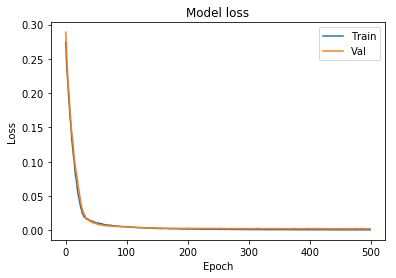

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [11]:
model_fin = models.Sequential()

model_fin.add(layers.Dense(256, kernel_initializer='normal',input_dim = x_tr.shape[1]))
model_fin.add(layers.BatchNormalization())
model_fin.add(layers.Activation('relu'))
model_fin.add(layers.Dense(256, kernel_initializer='normal'))
model_fin.add(layers.BatchNormalization())
model_fin.add(layers.Activation('relu'))

model_fin.add(layers.Dropout(0.5))

model_fin.add(layers.Dense(128, kernel_initializer='normal'))
model_fin.add(layers.BatchNormalization())
model_fin.add(layers.Activation('relu'))
model_fin.add(layers.Dense(128, kernel_initializer='normal'))
model_fin.add(layers.BatchNormalization())
model_fin.add(layers.Activation('relu'))

model_fin.add(layers.Dense(64, kernel_initializer='normal'))
model_fin.add(layers.BatchNormalization())
model_fin.add(layers.Activation('relu'))
model_fin.add(layers.Dense(64, kernel_initializer='normal'))
model_fin.add(layers.BatchNormalization())
model_fin.add(layers.Activation('relu'))

model_fin.add(layers.Dense(32, kernel_initializer='normal'))
model_fin.add(layers.BatchNormalization())
model_fin.add(layers.Activation('relu'))
model_fin.add(layers.Dense(32, kernel_initializer='normal'))
model_fin.add(layers.BatchNormalization())
model_fin.add(layers.Activation('relu'))

model_fin.add(layers.Dense(1, kernel_initializer='normal', activation='linear'))

model_fin.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               76800     
_________________________________________________________________
batch_normalization_15 (Batc (None, 256)               1024      
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

In [12]:
from keras import optimizers
learning_rate = 0.0001
model_fin.compile(optimizer=optimizers.RMSprop(lr=learning_rate),
              loss='mean_squared_error',
              metrics=['accuracy'])

In [13]:
hist = model_fin.fit(xscale, yscale,
       batch_size=128, epochs=500,
                )

Epoch 1/500
1456/1456 [==============================] - 2s 1ms/step - loss: 0.3398 - acc: 6.8681e-04
Epoch 2/500
1456/1456 [==============================] - 0s 88us/step - loss: 0.3108 - acc: 6.8681e-04
Epoch 3/500
1456/1456 [==============================] - 0s 80us/step - loss: 0.2860 - acc: 6.8681e-04
Epoch 4/500
1456/1456 [==============================] - 0s 86us/step - loss: 0.2693 - acc: 6.8681e-04
Epoch 5/500
1456/1456 [==============================] - 0s 86us/step - loss: 0.2497 - acc: 6.8681e-04
Epoch 6/500
1456/1456 [==============================] - 0s 89us/step - loss: 0.2329 - acc: 6.8681e-04
Epoch 7/500
1456/1456 [==============================] - 0s 89us/step - loss: 0.2128 - acc: 6.8681e-04
Epoch 8/500
1456/1456 [==============================] - 0s 82us/step - loss: 0.1983 - acc: 6.8681e-04
Epoch 9/500
1456/1456 [==============================] - 0s 85us/step - loss: 0.1799 - acc: 6.8681e-04
Epoch 10/500
1456/1456 [==============================] - 0s 88us/step - l

1456/1456 [==============================] - 0s 91us/step - loss: 0.0033 - acc: 0.0014
Epoch 82/500
1456/1456 [==============================] - 0s 93us/step - loss: 0.0032 - acc: 0.0014
Epoch 83/500
1456/1456 [==============================] - 0s 89us/step - loss: 0.0029 - acc: 0.0014
Epoch 84/500
1456/1456 [==============================] - 0s 82us/step - loss: 0.0032 - acc: 0.0014
Epoch 85/500
1456/1456 [==============================] - 0s 77us/step - loss: 0.0030 - acc: 0.0014
Epoch 86/500
1456/1456 [==============================] - 0s 90us/step - loss: 0.0031 - acc: 0.0014
Epoch 87/500
1456/1456 [==============================] - 0s 90us/step - loss: 0.0033 - acc: 0.0014
Epoch 88/500
1456/1456 [==============================] - 0s 92us/step - loss: 0.0030 - acc: 0.0014
Epoch 89/500
1456/1456 [==============================] - 0s 96us/step - loss: 0.0029 - acc: 0.0014
Epoch 90/500
1456/1456 [==============================] - 0s 90us/step - loss: 0.0029 - acc: 0.0014
Epoch 91/500


1456/1456 [==============================] - 0s 84us/step - loss: 0.0014 - acc: 0.0014
Epoch 163/500
1456/1456 [==============================] - 0s 83us/step - loss: 0.0014 - acc: 0.0014
Epoch 164/500
1456/1456 [==============================] - 0s 78us/step - loss: 0.0013 - acc: 0.0014
Epoch 165/500
1456/1456 [==============================] - 0s 79us/step - loss: 0.0015 - acc: 0.0014
Epoch 166/500
1456/1456 [==============================] - 0s 77us/step - loss: 0.0011 - acc: 0.0014
Epoch 167/500
1456/1456 [==============================] - 0s 82us/step - loss: 0.0013 - acc: 0.0014
Epoch 168/500
1456/1456 [==============================] - 0s 77us/step - loss: 0.0013 - acc: 0.0014
Epoch 169/500
1456/1456 [==============================] - 0s 79us/step - loss: 0.0014 - acc: 0.0014
Epoch 170/500
1456/1456 [==============================] - 0s 79us/step - loss: 0.0012 - acc: 0.0014  
Epoch 171/500
1456/1456 [==============================] - 0s 79us/step - loss: 0.0014 - acc: 0.0014
Ep

1456/1456 [==============================] - 0s 99us/step - loss: 9.6874e-04 - acc: 0.0014
Epoch 242/500
1456/1456 [==============================] - 0s 109us/step - loss: 8.1712e-04 - acc: 0.0014
Epoch 243/500
1456/1456 [==============================] - 0s 82us/step - loss: 8.9752e-04 - acc: 0.0014
Epoch 244/500
1456/1456 [==============================] - 0s 82us/step - loss: 7.8689e-04 - acc: 0.0014
Epoch 245/500
1456/1456 [==============================] - 0s 80us/step - loss: 8.1997e-04 - acc: 0.0014
Epoch 246/500
1456/1456 [==============================] - 0s 77us/step - loss: 7.6619e-04 - acc: 0.0014
Epoch 247/500
1456/1456 [==============================] - 0s 79us/step - loss: 8.6024e-04 - acc: 0.0014
Epoch 248/500
1456/1456 [==============================] - 0s 76us/step - loss: 8.7204e-04 - acc: 0.0014
Epoch 249/500
1456/1456 [==============================] - 0s 90us/step - loss: 8.4059e-04 - acc: 0.0014
Epoch 250/500
1456/1456 [==============================] - 0s 93us/s

1456/1456 [==============================] - 0s 95us/step - loss: 6.6772e-04 - acc: 0.0014
Epoch 320/500
1456/1456 [==============================] - 0s 105us/step - loss: 6.5178e-04 - acc: 0.0014
Epoch 321/500
1456/1456 [==============================] - 0s 96us/step - loss: 6.3532e-04 - acc: 0.0014
Epoch 322/500
1456/1456 [==============================] - 0s 81us/step - loss: 7.3307e-04 - acc: 0.0014
Epoch 323/500
1456/1456 [==============================] - 0s 77us/step - loss: 6.7447e-04 - acc: 0.0014
Epoch 324/500
1456/1456 [==============================] - 0s 75us/step - loss: 4.9741e-04 - acc: 0.0014
Epoch 325/500
1456/1456 [==============================] - 0s 104us/step - loss: 5.6053e-04 - acc: 0.0014
Epoch 326/500
1456/1456 [==============================] - 0s 92us/step - loss: 6.3086e-04 - acc: 0.0014
Epoch 327/500
1456/1456 [==============================] - 0s 81us/step - loss: 6.1655e-04 - acc: 0.0014
Epoch 328/500
1456/1456 [==============================] - 0s 75us/

1456/1456 [==============================] - 0s 92us/step - loss: 6.6675e-04 - acc: 0.0014
Epoch 397/500
1456/1456 [==============================] - 0s 86us/step - loss: 4.6147e-04 - acc: 0.0014
Epoch 398/500
1456/1456 [==============================] - 0s 75us/step - loss: 4.4813e-04 - acc: 0.0014
Epoch 399/500
1456/1456 [==============================] - 0s 82us/step - loss: 4.7459e-04 - acc: 0.0014
Epoch 400/500
1456/1456 [==============================] - 0s 77us/step - loss: 3.9575e-04 - acc: 0.0014
Epoch 401/500
1456/1456 [==============================] - 0s 86us/step - loss: 4.7847e-04 - acc: 0.0014
Epoch 402/500
1456/1456 [==============================] - 0s 90us/step - loss: 5.3189e-04 - acc: 0.0014
Epoch 403/500
1456/1456 [==============================] - 0s 89us/step - loss: 4.7258e-04 - acc: 0.0014
Epoch 404/500
1456/1456 [==============================] - 0s 92us/step - loss: 4.9758e-04 - acc: 0.0014
Epoch 405/500
1456/1456 [==============================] - 0s 102us/s

1456/1456 [==============================] - 0s 79us/step - loss: 4.7650e-04 - acc: 0.0014
Epoch 474/500
1456/1456 [==============================] - 0s 82us/step - loss: 3.6552e-04 - acc: 0.0014
Epoch 475/500
1456/1456 [==============================] - 0s 79us/step - loss: 4.5882e-04 - acc: 0.0014
Epoch 476/500
1456/1456 [==============================] - 0s 87us/step - loss: 3.8612e-04 - acc: 0.0014
Epoch 477/500
1456/1456 [==============================] - 0s 92us/step - loss: 4.1396e-04 - acc: 0.0014
Epoch 478/500
1456/1456 [==============================] - 0s 99us/step - loss: 4.2283e-04 - acc: 0.0014
Epoch 479/500
1456/1456 [==============================] - 0s 87us/step - loss: 3.7874e-04 - acc: 0.0014
Epoch 480/500
1456/1456 [==============================] - 0s 93us/step - loss: 5.2034e-04 - acc: 0.0014
Epoch 481/500
1456/1456 [==============================] - 0s 84us/step - loss: 4.1922e-04 - acc: 0.0014
Epoch 482/500
1456/1456 [==============================] - 0s 93us/st

In [14]:
preds = model_fin.predict(test)
preds = scaler_y.inverse_transform(preds)
print(preds[0:10])

[[11.782541]
 [11.913156]
 [12.099238]
 [12.17112 ]
 [12.162843]
 [12.036276]
 [12.056949]
 [11.992325]
 [12.131138]
 [11.787761]]


In [15]:
Id = []
price = []
for x in range(1461,2920):
    Id.append(x)
for x in preds:
    price.append(x[0])
price = np.exp(price)
print(price[0])

130946.125


In [16]:
output=pd.DataFrame({'Id':Id, 'SalePrice':price})
output.to_csv('submission_neural_network_3.csv', index=False)